project topic and details

# Setup

## Load and Import libraries

In [3]:
!pip install langdetect
!pip install kneed
!pip install scispacy
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_lg-0.5.4.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=59d77ba06e20af6aec36c3bc7bcf699a2f999b393601db485d096198f35ae7b7
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 kB 23.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 8.9 MB/s eta 0:00:00
  Using cached pybind11-2.6.1-py2.py3-none-any.whl (188 kB)
  Created wheel for nmslib: filename=nmslib-2.1.1-cp310-cp310-linux_x86_64.whl size=13578652 sha256=4030c158386176fe07b38c4c4a3b8504e3b130d7e8fce4e58f0663b8

In [61]:
import numpy as np
import pandas as pd

In [181]:
# Plotting and visualization
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_formats = ['svg']
import seaborn as sns

# Used to draw a progress bar for longer method calls
from tqdm import tqdm

# Used to detect language used in each document
from langdetect import detect
from langdetect import DetectorFactory
DetectorFactory.seed = 0

# Pre-trained natural language processing pipeline for biomedical use
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_sci_lg

# Used to import list of punctuations
import string

# Feature extraction (text vectorizers)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Clustering and evaluation
from sklearn.cluster import KMeans , AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from kneed import KneeLocator
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Topic modeling
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF

# Stemming words
from nltk.stem import PorterStemmer

# Interactive t-SNE plot
import plotly.express as px
import plotly.graph_objects as go


## Load dataset

!gdown 15E8FLX0C-6qpK-lDBEQJXw00Lsdcvjae

In [255]:
!gdown 15E8FLX0C-6qpK-lDBEQJXw00Lsdcvjae

Downloading...
From (original): https://drive.google.com/uc?id=15E8FLX0C-6qpK-lDBEQJXw00Lsdcvjae
From (redirected): https://drive.google.com/uc?id=15E8FLX0C-6qpK-lDBEQJXw00Lsdcvjae&confirm=t&uuid=1bc48bff-d0b8-493d-a5ee-9a472edafc87
To: /content/10k_df.csv
100% 341M/341M [00:04<00:00, 81.8MB/s]


# Preprocess

## fill null and sampling

In [256]:
df_10k = pd.read_csv('10k_df.csv')

In [ ]:
df_10k.fillna(value=" ",inplace=True)

In [ ]:
df = df_10k.sample(1500, random_state=42)
del df_10k
try:
    print(df_10k)
except NameError as e:
    print(e)

name 'df_10k' is not defined


In [ ]:
pd.DataFrame(df)

,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary
6252,fefd6cdcddcb00d1ba2ef1a0d3bba9f312010a1d,10.1111/j.1524-4733.2008.00379.x,,China is the biggest country in the world that...,"Li, Youing. Sun, Xin. Wang, Li",Evidence-Based Medicine in China,Value in Health,Not provided.
4684,2a3d080d5dcf6771db002366691f35e5d6f0e493,10.1007/s13238-010-0029-7,,"✉ Correspondence: zlshi@wh.iov.cn Bat, the onl...","Shi, Zhengli",Bat and virus,Protein & Cell,Not provided.
1731,2de657aabab331e75657bfc1443542fd345b6f26,10.1016/j.ccc.2019.06.001,KEYWORDS\nPandemic Influenza Disaster prepared...,Outbreaks of infectious disease pose unique ch...,"Maves, Ryan C.. Jamros, Christina M.. Smith...",Intensive Care Unit Preparedness During<br>Pa...,Crit Care Clin,KEYWORDS\nPandemic Influenza Disaster<br>prep...
4742,bc22758234283f024f16e2dbe660bc909b512b92,10.1016/j.vetpar.2007.11.020,Cryptosporidium parvum is recognized as one of...,Diarrhoeal diseases of infectious aethiology r...,"Klein, Pavel. Kleinová, Tereza. Volek,<br>Z...",Effect of Cryptosporidium parvum infection on...,Veterinary Parasitology,Cryptosporidium parvum is recognized as one o...
4521,a204aafa38365dbcc0a26af3ca2c6d3313d7fab2,10.1111/irv.12518,", Brazil, in the period of Background: The res...",The inclusion criteria for asymptomatic adults...,"Moreira, Luciana Peniche. Watanabe, Aripuana...",Respiratory syncytial virus evaluation among<...,Influenza Other Respir Viruses,", Brazil, in the period of Background: The<br..."
...,...,...,...,...,...,...,...,...
967,e021d75c9a2c8f02f80ccfbad4133b15d1777576,10.1038/sj.eye.6701885,Many new infectious diseases in humans have be...,Severe acute respiratory syndrome (SARS) is th...,"Chan, W-M. Liu, D T L. Chan, P K S. Chong,...",Precautions in ophthalmic practice in a<br>ho...,Eye (Lond),Many new infectious diseases in humans have<b...
6043,24beb94c313a07be6b0c745a6ca8a3d810618506,,The Middle East respiratory syndrome coronavir...,The Middle East respiratory syndrome (MERS) is...,"Ozharovskaia, T. A.. Zubkova, O. V.. <br>Dol...",Immunogenicity of Different Forms of Middle<b...,Acta Naturae,The Middle East respiratory syndrome<br>coron...
6879,94475eaa419b11d7edf53c2fe4e423acef0ce881,10.12688/wellcomeopenres.15718.1,The current novel coronavirus outbreak appears...,The ongoing outbreak of novel Coronavirus appe...,"Abbott, Sam. Hellewell, Joel. Munday, James...",The transmissibility of novel Coronavirus in<...,Wellcome Open Res,The current novel coronavirus outbreak<br>app...
6775,a6ab8b27158a48683b4fa6d081614cde9087cc5e,10.1016/j.bja.2020.05.002,,Editor -The critical shortage of medical suppl...,"Lang, Angela L.. Shaw, Kendrick M.. Lozano,...",Effectiveness of a negative-pressure patient<...,Br. j. anaesth,Not provided.



## Text Processing

1. **Language Detection and Selection:**
   - Detect the language of the text and choose the most frequently used language.

2. **Tokenization:**
   - Break down the text into individual tokens (words or phrases).

3. **Lemmatization and Stemming:**
   - Apply lemmatization to reduce words to their base or root form.
   - Apply stemming to remove suffixes and obtain the stem of the words.

4. **Stopword Removal:**
   - Remove common stopwords (e.g., "and," "the," "is") from the text.

5. **Punctuation Removal:**
   - Remove punctuation marks from the text.

In [ ]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown language."

In [ ]:
df = df[df['body_text'].apply(detect_language) =='en']

In [ ]:
stemmer = PorterStemmer()

In [ ]:
parser = en_core_sci_lg.load(disable=["tagger", "ner"])
parser.max_length = 3000000


def process_text(text):
    doc = parser(text)
    tokens = [token for token in doc if not token.is_stop and token.text not in string.punctuation]
    return [stemmer.stem(token.text) for token in tokens]

In [ ]:
df['body_text'] = df['body_text'].apply(lambda text: process_text(text))

/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


# Load dataset after preprocess

In [5]:
!gdown 18Ju-NDzJZbdD0d_Zb-UFekYjVxBweMwE

Downloading...
From: https://drive.google.com/uc?id=18Ju-NDzJZbdD0d_Zb-UFekYjVxBweMwE
To: /content/pre_processed_df.csv
100% 47.9M/47.9M [00:01<00:00, 28.8MB/s]


In [63]:
df = pd.read_csv('pre_processed_df.csv')
df

,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary
0,fefd6cdcddcb00d1ba2ef1a0d3bba9f312010a1d,10.1111/j.1524-4733.2008.00379.x,,"['china', 'biggest', 'countri', 'world', '1.3'...","Li, Youing. Sun, Xin. Wang, Li",Evidence-Based Medicine in China,Value in Health,Not provided.
1,2a3d080d5dcf6771db002366691f35e5d6f0e493,10.1007/s13238-010-0029-7,,"['✉', 'correspond', 'zlshi@wh.iov.cn', 'bat', ...","Shi, Zhengli",Bat and virus,Protein & Cell,Not provided.
2,2de657aabab331e75657bfc1443542fd345b6f26,10.1016/j.ccc.2019.06.001,KEYWORDS\nPandemic Influenza Disaster prepared...,"['outbreak', 'infecti', 'diseas', 'pose', 'uni...","Maves, Ryan C.. Jamros, Christina M.. Smith...",Intensive Care Unit Preparedness During<br>Pa...,Crit Care Clin,KEYWORDS\nPandemic Influenza Disaster<br>prep...
3,bc22758234283f024f16e2dbe660bc909b512b92,10.1016/j.vetpar.2007.11.020,Cryptosporidium parvum is recognized as one of...,"['diarrhoeal', 'diseas', 'infecti', 'aethiolog...","Klein, Pavel. Kleinová, Tereza. Volek,<br>Z...",Effect of Cryptosporidium parvum infection on...,Veterinary Parasitology,Cryptosporidium parvum is recognized as one o...
4,a204aafa38365dbcc0a26af3ca2c6d3313d7fab2,10.1111/irv.12518,", Brazil, in the period of Background: The res...","['inclus', 'criteria', 'asymptomat', 'adult', ...","Moreira, Luciana Peniche. Watanabe, Aripuana...",Respiratory syncytial virus evaluation among<...,Influenza Other Respir Viruses,", Brazil, in the period of Background: The<br..."
...,...,...,...,...,...,...,...,...
1449,e021d75c9a2c8f02f80ccfbad4133b15d1777576,10.1038/sj.eye.6701885,Many new infectious diseases in humans have be...,"['sever', 'acut', 'respiratori', 'syndrom', 's...","Chan, W-M. Liu, D T L. Chan, P K S. Chong,...",Precautions in ophthalmic practice in a<br>ho...,Eye (Lond),Many new infectious diseases in humans have<b...
1450,24beb94c313a07be6b0c745a6ca8a3d810618506,,The Middle East respiratory syndrome coronavir...,"['middl', 'east', 'respiratori', 'syndrom', 'm...","Ozharovskaia, T. A.. Zubkova, O. V.. <br>Dol...",Immunogenicity of Different Forms of Middle<b...,Acta Naturae,The Middle East respiratory syndrome<br>coron...
1451,94475eaa419b11d7edf53c2fe4e423acef0ce881,10.12688/wellcomeopenres.15718.1,The current novel coronavirus outbreak appears...,"['ongo', 'outbreak', 'novel', 'coronaviru', 'a...","Abbott, Sam. Hellewell, Joel. Munday, James...",The transmissibility of novel Coronavirus in<...,Wellcome Open Res,The current novel coronavirus outbreak<br>app...
1452,a6ab8b27158a48683b4fa6d081614cde9087cc5e,10.1016/j.bja.2020.05.002,,"['editor', '-the', 'critic', 'shortag', 'medic...","Lang, Angela L.. Shaw, Kendrick M.. Lozano,...",Effectiveness of a negative-pressure patient<...,Br. j. anaesth,Not provided.


# Feature extraction using tf-idf

In [ ]:
tf_idf = TfidfVectorizer(max_features=4096)
tfidf_vectors = tf_idf.fit_transform([' '.join(tokens) for tokens in df['body_text']])

In [ ]:
tfidf_df = pd.DataFrame(tfidf_vectors.toarray(), columns=tf_idf.get_feature_names_out())
tfidf_df
# df = df.drop(columns=['body_text'])
# df = pd.concat([df, tfidf_df], axis=1)

# Load dataset after feature extraction

In [9]:
# Continue from where we left: TFIDF_vectors
!gdown 1V0VHdYwOPFMQhdyzYonPZYkqQsLhyjBd

Downloading...
From: https://drive.google.com/uc?id=1V0VHdYwOPFMQhdyzYonPZYkqQsLhyjBd
To: /content/tfidf_vectors.csv
100% 38.1M/38.1M [00:00<00:00, 70.8MB/s]


In [266]:
body_text_df = pd.read_csv('tfidf_vectors.csv')
pd.DataFrame(body_text_df)

,00,000,0001,001,002,003,005,01,02,03,...,zone,zoonot,µg,µl,µm,à1,κb,μg,μl,μm
0,0.000000,0.026791,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.022184,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.017655,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2,0.000000,0.038931,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.011604,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.007733,0.0,0.000000,...,0.0,0.010189,0.000000,0.000000,0.000000,0.029283,0.0,0.0,0.000000,0.000000
4,0.000000,0.000000,0.070752,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.021421,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1450,0.008476,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.028917,0.018494,0.009525,0.000000,0.0,0.0,0.000000,0.000000
1451,0.000000,0.006354,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1452,0.000000,0.020174,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.216002,0.000000,0.0,0.0,0.000000,0.038335


# PCA

In [267]:
pca = PCA(n_components=0.95, svd_solver='full')
body_text_df = pca.fit_transform(body_text_df)

## Plotting the first two principal components

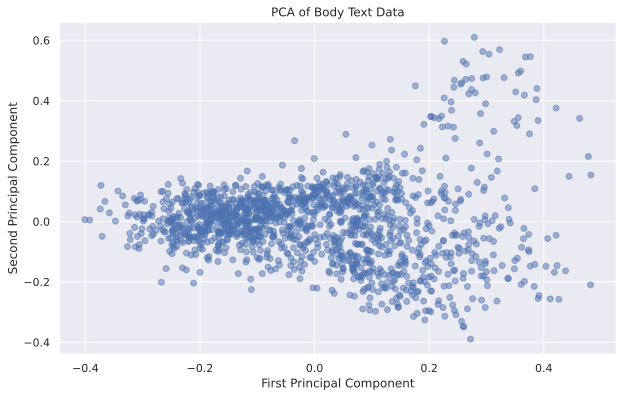

In [270]:
plt.figure(figsize=(10, 6))
plt.scatter(body_text_df[:, 0], body_text_df[:, 1], alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Body Text Data')
plt.grid(True)
plt.show()

## Explained variance ratio of the principal components


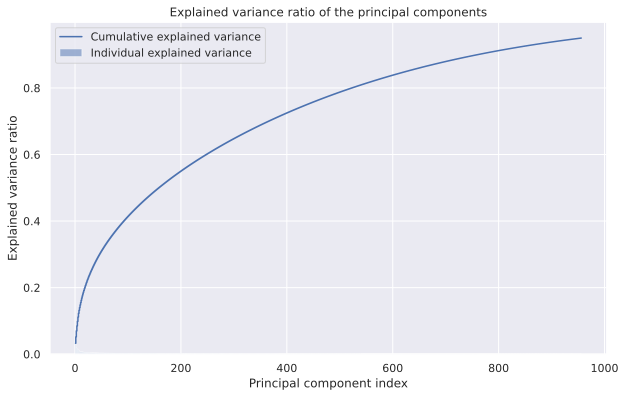

In [268]:
explained_variance_ratio = pca.explained_variance_ratio_

cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plotting the explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid',
         label='Cumulative explained variance')
plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.title('Explained variance ratio of the principal components')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# clustering

## plot clusters in chart

In [211]:
# Function to visualize clusters
def plot_clusters(data, labels, title):
    plt.figure(figsize=(10, 6))
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)
        xy = data[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title(title)
    plt.show()

## Elbow method

In [212]:
# Define the Elbow Method function for K-means
def Elbow_Method(data, kmin=1, kmax=31):
    k_values = range(kmin, kmax, 2)
    wcss_values = []
    distortion_values = []

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=16, n_init="auto")
        kmeans.fit(data)
        distortion_values.append(np.sum(np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])
        wcss_values.append(kmeans.inertia_)

    return k_values, wcss_values, distortion_values

### Plot the Elbow Method results

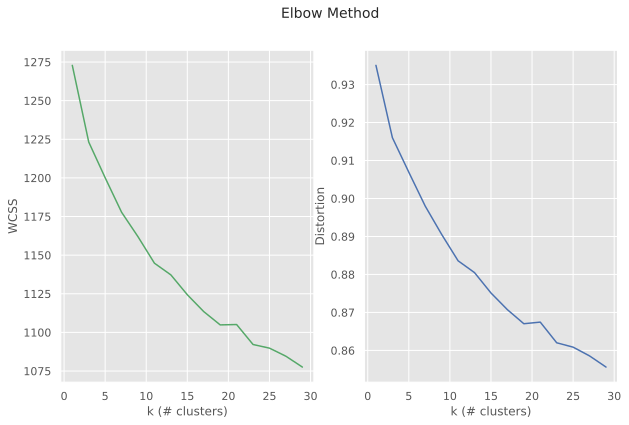

In [213]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

k, wcss, distortion = Elbow_Method(body_text_df)

ax1.plot(k, wcss, linestyle='-', color='g')
ax1.set_xlabel('k (# clusters)')
ax1.set_ylabel('WCSS')
ax1.grid(True)

ax2.plot(k, distortion, linestyle='-', color='b')
ax2.set_xlabel('k (# clusters)')
ax2.set_ylabel('Distortion')
ax2.grid(True)

fig.suptitle('Elbow Method', fontsize=14)
plt.show()

### Finding Optimal number of clusters using KneeLocator

In [214]:
kl = KneeLocator(k, wcss, curve="convex", direction="decreasing")
n_clusters = kl.elbow
print(f'Optimal number of clusters (k) set to: {n_clusters}')

Optimal number of clusters (k) set to: 11


## Fit clustering methods

### KMeans chart and Silhouette score

KMeans Clustering labels and counts: {0: 81, 1: 180, 2: 125, 3: 121, 4: 126, 5: 32, 6: 296, 7: 273, 8: 61, 9: 94, 10: 65}


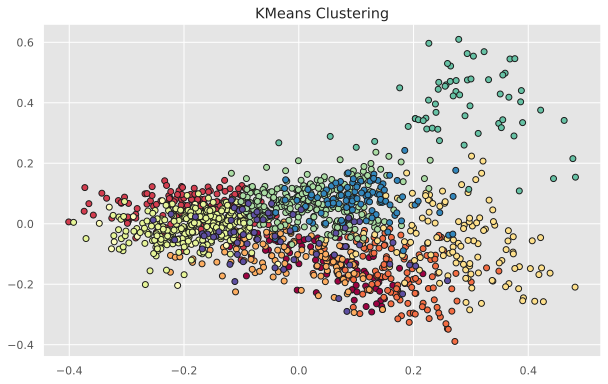

Silhouette Score for KMeans: 0.02


In [215]:
# Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=16, n_init="auto")
kmeans.fit(body_text_df)
labels_kmeans = kmeans.labels_

unique, counts = np.unique(labels_kmeans, return_counts=True)
print("KMeans Clustering labels and counts:", dict(zip(unique, counts)))

# Visualize KMeans results
plot_clusters(body_text_df, labels_kmeans, "KMeans Clustering")

# Silhouette Score for KMeans
silhouette_kmeans = silhouette_score(body_text_df, labels_kmeans)
print(f'Silhouette Score for KMeans: {silhouette_kmeans:.2f}')

### Agglomerative chart and Silhouette score

Agglomerative Clustering labels and counts: {0: 185, 1: 275, 2: 353, 3: 103, 4: 92, 5: 53, 6: 72, 7: 108, 8: 126, 9: 74, 10: 13}


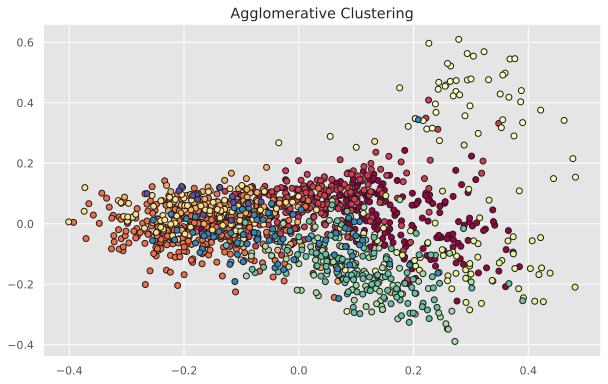

Silhouette Score for Agglomerative Clustering: 0.02


In [216]:
# Fit Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters)
labels_agg = agg_cluster.fit_predict(body_text_df)

unique, counts = np.unique(labels_agg, return_counts=True)
print("Agglomerative Clustering labels and counts:", dict(zip(unique, counts)))

plot_clusters(body_text_df, labels_agg, "Agglomerative Clustering")

silhouette_agg = silhouette_score(body_text_df, labels_agg)
print(f'Silhouette Score for Agglomerative Clustering: {silhouette_agg:.2f}')

### Gaussian Mixture Models chart and Silhouette score

GMM labels and counts: {0: 103, 1: 68, 2: 61, 3: 133, 4: 244, 5: 205, 6: 151, 7: 108, 8: 58, 9: 236, 10: 87}


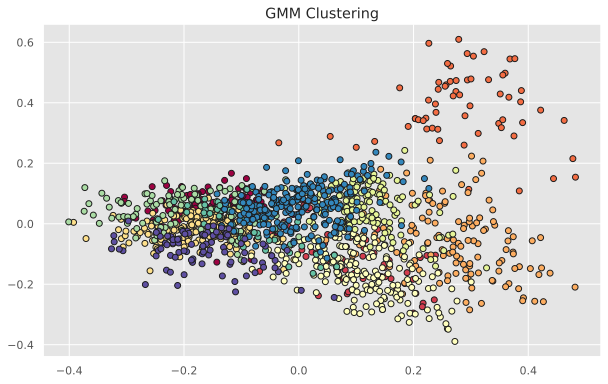

Silhouette Score for GMM: 0.02


In [217]:
# Fit Gaussian Mixture Models (GMM)
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
labels_gmm = gmm.fit_predict(body_text_df)

unique, counts = np.unique(labels_gmm, return_counts=True)
print("GMM labels and counts:", dict(zip(unique, counts)))

plot_clusters(body_text_df, labels_gmm, "GMM Clustering")

silhouette_gmm = silhouette_score(body_text_df, labels_gmm)
print(f'Silhouette Score for GMM: {silhouette_gmm:.2f}')

### DBSCAN

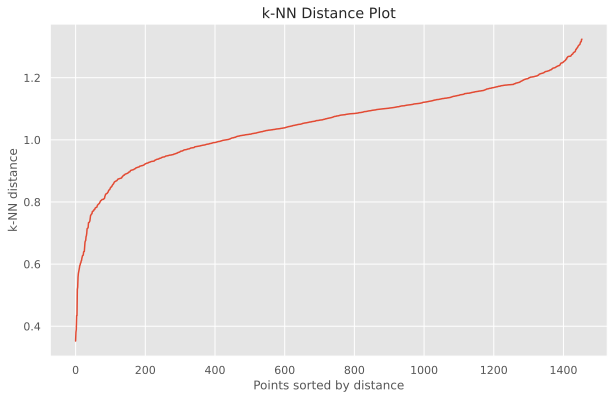

In [218]:
# Determine the k-th nearest neighbors
k = 5
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(body_text_df)
distances, indices = neighbors_fit.kneighbors(body_text_df)

# Sort the distances to find the elbow point
distances = np.sort(distances[:, k-1], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('k-NN Distance Plot')
plt.xlabel('Points sorted by distance')
plt.ylabel('k-NN distance')
plt.show()

DBSCAN with eps=0.3: {-1: 1454}


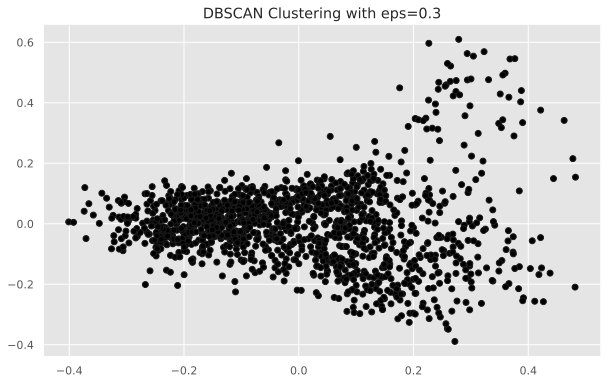

Only one cluster found with eps=0.3, skipping silhouette score calculation.
DBSCAN with eps=0.6: {-1: 1437, 0: 17}


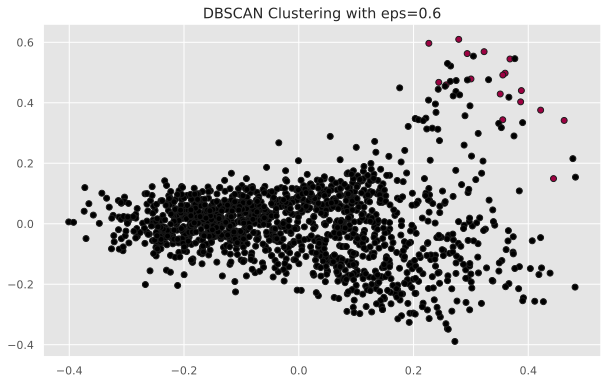

Silhouette Score for DBSCAN with eps=0.6: 0.00
DBSCAN with eps=0.8: {-1: 1337, 0: 10, 1: 5, 2: 36, 3: 7, 4: 7, 5: 9, 6: 15, 7: 7, 8: 6, 9: 5, 10: 5, 11: 5}


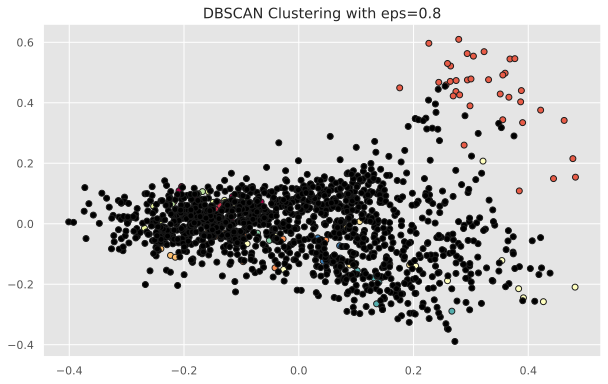

Silhouette Score for DBSCAN with eps=0.8: -0.03
DBSCAN with eps=0.9: {-1: 1163, 0: 14, 1: 9, 2: 148, 3: 23, 4: 7, 5: 8, 6: 8, 7: 7, 8: 5, 9: 11, 10: 6, 11: 6, 12: 5, 13: 6, 14: 5, 15: 6, 16: 7, 17: 5, 18: 5}


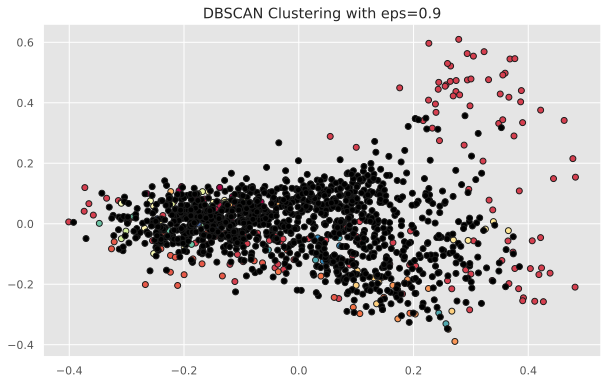

Silhouette Score for DBSCAN with eps=0.9: -0.04
DBSCAN with eps=0.95: {-1: 961, 0: 372, 1: 10, 2: 13, 3: 5, 4: 6, 5: 16, 6: 8, 7: 6, 8: 5, 9: 7, 10: 6, 11: 5, 12: 4, 13: 6, 14: 5, 15: 4, 16: 6, 17: 4, 18: 5}


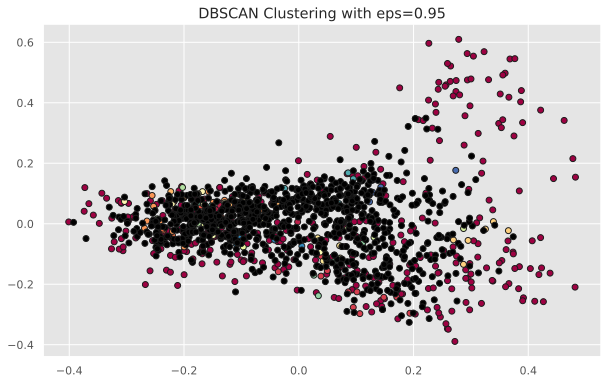

Silhouette Score for DBSCAN with eps=0.95: -0.03
DBSCAN with eps=1.0: {-1: 746, 0: 681, 1: 5, 2: 5, 3: 8, 4: 9}


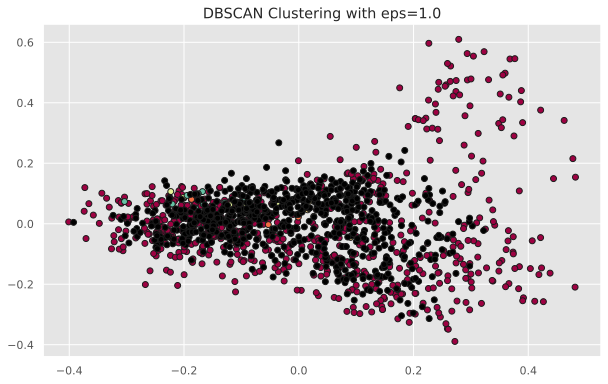

Silhouette Score for DBSCAN with eps=1.0: -0.01
DBSCAN with eps=1.2: {-1: 46, 0: 1408}


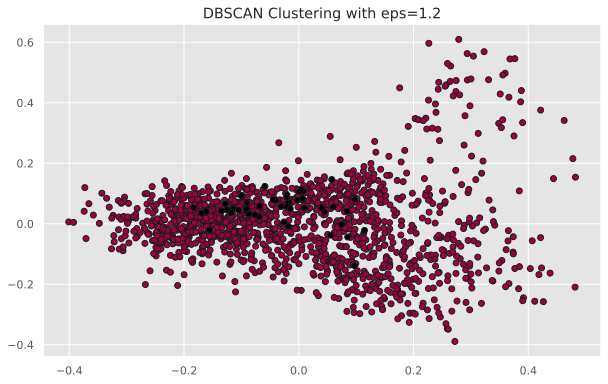

Silhouette Score for DBSCAN with eps=1.2: 0.03


In [219]:
from sklearn.cluster import DBSCAN
# Try different eps values for DBSCAN
eps_values = [0.3 ,0.6 , 0.8,0.9,0.95 ,1.0, 1.2]

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan.fit(body_text_df)
    labels_dbscan = dbscan.labels_

    unique, counts = np.unique(labels_dbscan, return_counts=True)
    print(f"DBSCAN with eps={eps}: {dict(zip(unique, counts))}")

    plot_clusters(body_text_df, labels_dbscan, f"DBSCAN Clustering with eps={eps}")

    if len(set(labels_dbscan)) > 1:  # Avoid silhouette score calculation if only one cluster
        silhouette_dbscan = silhouette_score(body_text_df, labels_dbscan)
        print(f'Silhouette Score for DBSCAN with eps={eps}: {silhouette_dbscan:.2f}')
    else:
        print(f'Only one cluster found with eps={eps}, skipping silhouette score calculation.')


# t-SNE

## Apply t-SNE

In [222]:
body_text_2D = TSNE(n_components=2, perplexity=30).fit_transform(body_text_df)

In [223]:
labels, centroids = kmeans.labels_, kmeans.cluster_centers_

## plot t-SNE1 and t-SNE2 on scatterplot

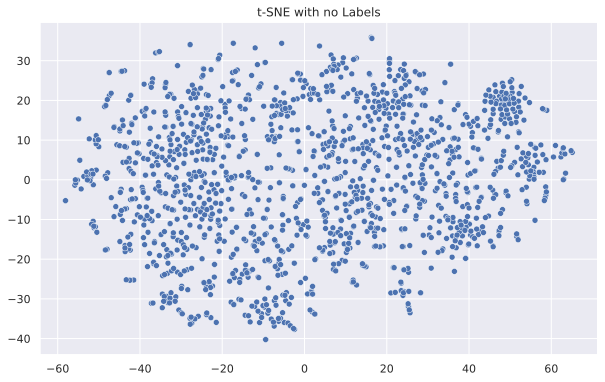

In [224]:
sns.set(rc={'figure.figsize':(10, 6)})

# Plot the data
sns.scatterplot(x=body_text_2D[:, 0], y=body_text_2D[:, 1])
plt.title('t-SNE with no Labels')
plt.savefig("t-sne_covid19.png")
plt.show()

## plot t-SNE1 and t-SNE2 on scatterplot with Kmean Labels

<ipython-input-225-f87463bfd58f>:5: UserWarning:

The palette list has more values (20) than needed (11), which may not be intended.



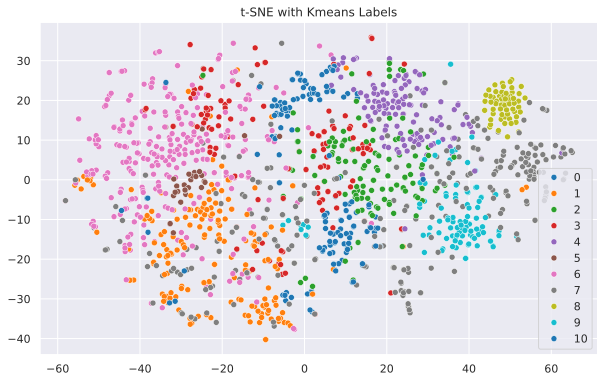

In [225]:
sns.set(rc={'figure.figsize':(10,6)})
palette = sns.color_palette("tab10", 20)

# Plot the data
sns.scatterplot(x=body_text_2D[:,0], y=body_text_2D[:,1], hue=labels, legend='full', palette=palette)
plt.title('t-SNE with Kmeans Labels')
plt.savefig("improved_cluster_tsne.png")
plt.show()

# Topic Modeling

## Perform K-means clustering (previously performed)

In [242]:
labels

array([9, 1, 2, ..., 7, 7, 7], dtype=int32)

## Vectorize the text data for each cluster

In [243]:
vectorizers = []
vectorized_data = []

for i in range(n_clusters):
    vectorizers.append(CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}'))
    cluster_data = df['body_text'][labels == i]
    if not cluster_data.empty:
        vectorized_data.append(vectorizers[i].fit_transform(cluster_data))
    else:
        vectorized_data.append(None)

## Apply LDA and NMF to each cluster

In [244]:
lda_models = []
nmf_models = []
NUM_TOPICS_PER_CLUSTER = 20

lda_distributions = []
nmf_distributions = []

for i in range(n_clusters):
    if vectorized_data[i] is not None:
        lda = LatentDirichletAllocation(n_components=NUM_TOPICS_PER_CLUSTER, max_iter=10, learning_method='online', verbose=False, random_state=42)
        lda_model = lda.fit(vectorized_data[i])
        lda_models.append(lda_model)
        lda_distributions.append(lda_model.transform(vectorized_data[i]))

        nmf = NMF(n_components=NUM_TOPICS_PER_CLUSTER, max_iter=2000, tol=1e-3, init='nndsvda', random_state=42)
        nmf_model = nmf.fit(vectorized_data[i])
        nmf_dist = nmf_model.transform(vectorized_data[i])
        nmf_dist = nmf_dist / np.sum(nmf_dist, axis=1, keepdims=True)  # Normalize to get proportions
        nmf_models.append(nmf_model)
        nmf_distributions.append(nmf_dist)
    else:
        lda_models.append(None)
        nmf_models.append(None)
        lda_distributions.append(None)
        nmf_distributions.append(None)

## Extract and display the top words for each cluster

In [245]:
def display_topics_with_percentages(model, vectorizer, distribution, no_top_words):
    topics_with_percentages = []
    for topic_idx, topic in enumerate(model.components_):
        keywords = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_percentage = np.mean(distribution[:, topic_idx])
        topics_with_percentages.append((keywords, topic_percentage))
    return topics_with_percentages

def display_cluster_keywords_with_percentages(model_list, model_name, distributions):
    all_keywords_with_percentages = []
    for i in range(n_clusters):
        if vectorized_data[i] is not None:
            keywords_with_percentages = display_topics_with_percentages(model_list[i], vectorizers[i], distributions[i], no_top_words)
            all_keywords_with_percentages.append(keywords_with_percentages)
            print(f"{model_name} - Cluster {i}:")
            for topic_keywords, percentage in keywords_with_percentages:
                print(f"  Keywords: {', '.join(topic_keywords)}, Percentage: {percentage:.2f}")
    return all_keywords_with_percentages

## print Keywords and Percentages per Cluster for each method

In [246]:
no_top_words = 5

print("LDA Keywords and Percentages per Cluster:")
lda_keywords_with_percentages = display_cluster_keywords_with_percentages(lda_models, "LDA", lda_distributions)

print("\nNMF Keywords and Percentages per Cluster:")
nmf_keywords_with_percentages = display_cluster_keywords_with_percentages(nmf_models, "NMF", nmf_distributions)

LDA Keywords and Percentages per Cluster:
LDA - Cluster 0:
  Keywords: influenza, children, patient, rsv, ill, Percentage: 0.00
  Keywords: influenza, laboratori, diagnost, patient, assay, Percentage: 0.01
  Keywords: pneumonia, children, patient, influenza, age, Percentage: 0.00
  Keywords: influenza, pneumonia, vaccin, children, patient, Percentage: 0.20
  Keywords: recipi, patient, mortal, transplant, influenza, Percentage: 0.03
  Keywords: hadv, fast, assay, coeffici, sampl, Percentage: 0.01
  Keywords: children, detect, hrv, sampl, pneumonia, Percentage: 0.00
  Keywords: influenza, children, vaccin, hrv, human, Percentage: 0.00
  Keywords: pneumonia, patient, children, pathogen, bacteri, Percentage: 0.00
  Keywords: hrv, children, detect, cell, hmpv, Percentage: 0.11
  Keywords: asthma, children, patient, infant, bronchiol, Percentage: 0.00
  Keywords: asthma, wheez, children, age, airway, Percentage: 0.05
  Keywords: asthma, children, age, admiss, increas, Percentage: 0.02
  Keyw

## Plot Heatmap and Parallel Coordinates of LDA and NMF

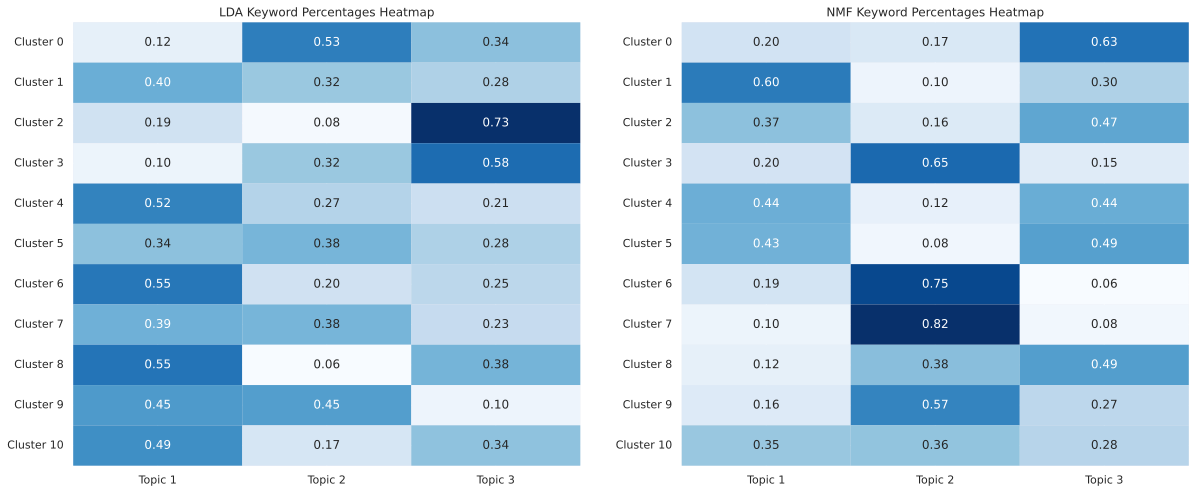

In [254]:
import seaborn as sns
import pandas as pd

lda_df = pd.DataFrame(lda_percentages, columns=[f'Topic {i+1}' for i in range(len(lda_percentages[0]))])
lda_df.index = [f'Cluster {i}' for i in range(len(lda_df))]

nmf_df = pd.DataFrame(nmf_percentages, columns=[f'Topic {i+1}' for i in range(len(nmf_percentages[0]))])
nmf_df.index = [f'Cluster {i}' for i in range(len(nmf_df))]

# Plot heatmaps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(lda_df, annot=True, fmt=".2f", ax=ax1, cmap='Blues', cbar=False)
ax1.set_title('LDA Keyword Percentages Heatmap')

sns.heatmap(nmf_df, annot=True, fmt=".2f", ax=ax2, cmap='Blues', cbar=False)
ax2.set_title('NMF Keyword Percentages Heatmap')

plt.show()

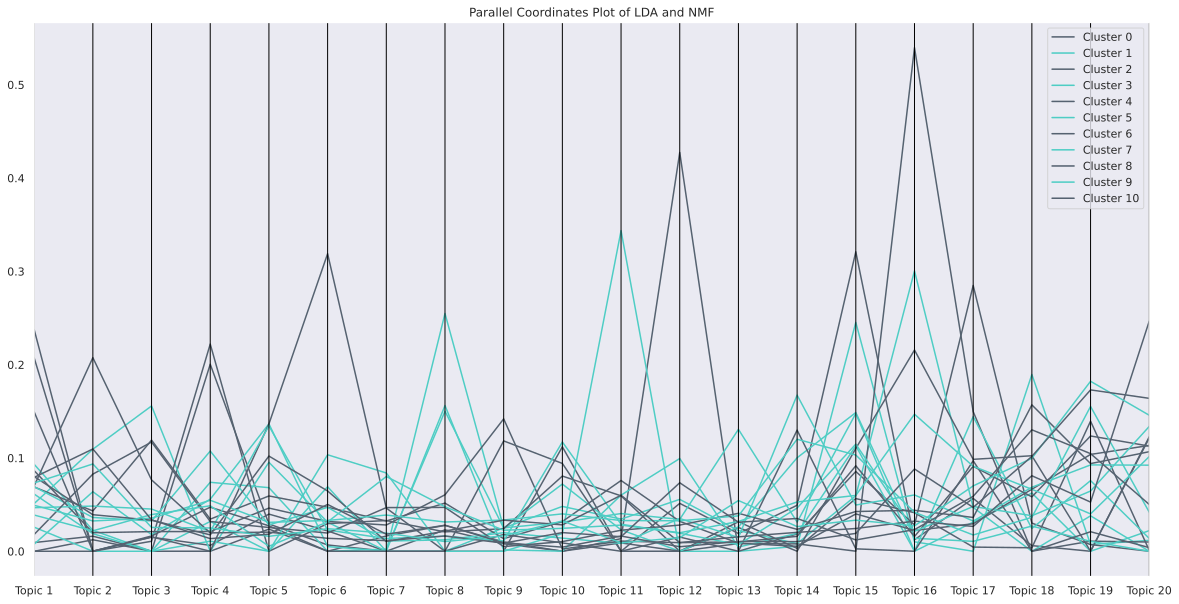

In [253]:
import pandas as pd
from pandas.plotting import parallel_coordinates

def create_parallel_coordinates_data(keywords_with_percentages, model_name, num_topics):
    data = {
        'Cluster': [],
        'Model': []
    }

    for i in range(num_topics):
        data[f'Topic {i+1}'] = []

    for i, cluster in enumerate(keywords_with_percentages):
        data['Cluster'].append(f'Cluster {i}')
        data['Model'].append(model_name)
        for j, (_, percentage) in enumerate(cluster):
            data[f'Topic {j+1}'].append(percentage)

    return pd.DataFrame(data)

lda_parallel_data = create_parallel_coordinates_data(lda_keywords_with_percentages, 'LDA', NUM_TOPICS_PER_CLUSTER)
nmf_parallel_data = create_parallel_coordinates_data(nmf_keywords_with_percentages, 'NMF', NUM_TOPICS_PER_CLUSTER)

parallel_data = pd.concat([lda_parallel_data, nmf_parallel_data])

plt.figure(figsize=(20, 10))
parallel_coordinates(parallel_data, 'Cluster', cols=[f'Topic {i+1}' for i in range(NUM_TOPICS_PER_CLUSTER)], color=('#556270', '#4ECDC4'))
plt.title('Parallel Coordinates Plot of LDA and NMF')
plt.show()

# interactive plot

In [226]:
def interactive_plot(df):
    clusters = sorted(df['y'].unique())

    # Generate distinct colors for each cluster using Plotly's colors
    colors = px.colors.qualitative.Plotly

    # Create a scatter plot for each cluster with a unique color
    data = []
    for i, cluster in enumerate(clusters):
        cluster_data = df[df['y'] == cluster]
        scatter = go.Scatter(
            x=cluster_data['tsne-2d-one'],
            y=cluster_data['tsne-2d-two'],
            mode='markers',
            name=f'Cluster {cluster}',
            text=cluster_data['title'],
            hoverinfo='text',
            marker=dict(size=10, color=colors[i % len(colors)]),  # Assign a unique color
            visible=False  # Initially, make all traces invisible
        )
        data.append(scatter)

    # Add a scatter plot for all clusters with different colors
    scatter_all = go.Scatter(
        x=df['tsne-2d-one'],
        y=df['tsne-2d-two'],
        mode='markers',
        name='All Clusters',
        text=df['title'],
        hoverinfo='text',
        marker=dict(size=10, color=df['y'].map(lambda x: colors[x % len(colors)])),  # Assign colors by cluster
        visible=True  # Initially, show all clusters
    )
    data.append(scatter_all)

    x_min = df['tsne-2d-one'].min()
    x_max = df['tsne-2d-one'].max()
    y_min = df['tsne-2d-two'].min()
    y_max = df['tsne-2d-two'].max()

    # Initialize the figure
    fig = go.Figure(data=data)

    # Ensure square aspect ratio
    fig.update_layout(
        title='Cluster Visualization',
        xaxis=dict(title='t-SNE 1', range=[x_min, x_max]),  # Ensure x and y axes are equal
        yaxis=dict(title='t-SNE 2', range=[y_min, y_max]),
        width=1000,
        height=700  # Ensure the figure is square-shaped
    )

    # Add hover functionality
    fig.update_traces(
        hoverinfo='text',
        marker=dict(opacity=0.7, size=8),
    )

    # Add interactive slider for cluster selection
    steps = []
    for i, cluster in enumerate(clusters):
        step = dict(
            method='update',
            args=[{'visible': [False] * len(clusters) + [False]},  # Hide all clusters
                {'title': f'Cluster {cluster}'}],
            label=f'Cluster {cluster}'
        )
        # Only make the current cluster visible
        step['args'][0]['visible'][i] = True
        steps.append(step)

    # Add final step for all clusters
    steps.append(dict(
        method='update',
        args=[{'visible': [False] * len(clusters) + [True]},  # Only show the 'all clusters' trace
            {'title': 'All Clusters'}],
        label='All Clusters'
    ))

    sliders = [dict(
        active=len(steps) - 1,
        currentvalue={"prefix": "Cluster: "},
        pad={"t": 50},
        steps=steps
    )]

    fig.update_layout(
        sliders=sliders
    )

    # Display the plot
    fig.show()

In [227]:
df['y'] = labels
df['tsne-2d-one'] = body_text_2D[:, 0]
df['tsne-2d-two'] = body_text_2D[:, 1]
interactive_plot(df)